
## Binary Search Tree Operation

```
class Node:
    def __init_ (self, data):
        self.left = None # Contains reference to the left child node if it exists, otherwise None
        self.data = data # Stores data
        self.right = None # Contains reference to the right child node if it exists, otherwise None

```


Consider an implementation of a Binary Search Tree, where each node is created using the given class Node.
Suppose it has a root variable that contains the reference to the root node of the binary search tree.
Write a function leaf_nodes(root) that accepts the reference of root node root of a non-empty binary search tree
and returns a list containing the data present in all the leaf nodes of the tree, sorted in ascending order.

Sample input 1
105 18 8 3 15 25 17

Note:- Binary search tree is created using the hidden suffix code for a given order of elements in the input, and the reference of the root node is passed to the function leaf_nodes as a
parameter. You need to work on a binary search tree using the reference of the root node.

Leaf Nodes: [3, 17, 25]


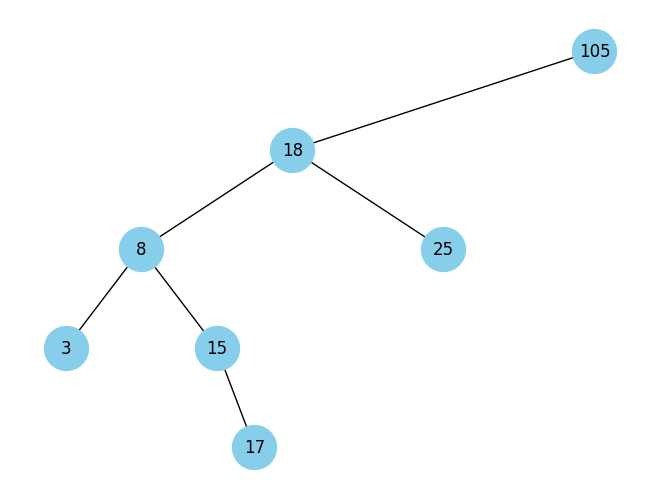

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

class Node:
  def __init__(self, data):
    self.left = None
    self.right = None
    self.data = data

def insert(root, data):
    if root is None:
        return Node(data)
    else:
        if data < root.data:
            root.left = insert(root.left, data)
        else:
            root.right = insert(root.right, data)
        return root

def construct_tree(values):
    root = None
    for value in values:
        root = insert(root, value)
    return root

def leaf_nodes(root):
    leaf_values = []

    def in_order_traversal(node):
        if node:
            in_order_traversal(node.left)
            if node.left is None and node.right is None:
                leaf_values.append(node.data)
            in_order_traversal(node.right)

    in_order_traversal(root)
    return leaf_values

def plot_tree(root):
    tree = nx.Graph()
    labels = {}
    pos = {}

    # Function to calculate positions and add nodes and edges recursively
    def traverse(node, x=0, y=0, dx=1.0, parent=None):
        if node:
            pos[x, y] = (x, -y) # Store the position for this node
            labels[x, y] = node.data
            if parent is not None:
                tree.add_edge((x, y), parent) # Add edge to parent
            # Traverse left and right subtrees, reducing horizontal spacing by half
            traverse(node.left, x - dx/2, y + 1, dx/2, (x, y))
            traverse(node.right, x + dx/2, y + 1, dx/2, (x, y))

    traverse(root, dx=2.0)
    nx.draw(tree, pos, labels=labels, with_labels=True, node_size=1000, node_color='skyblue')
    plt.show()


# Sample usage:
values = [105, 18, 8, 3, 15, 25, 17]
root = construct_tree(values)

print("Leaf Nodes:", leaf_nodes(root)) # Output the leaf nodes
plot_tree(root) # Plot the tree

In [16]:
# same approach just practicing in different way
class Node:
  def __init__(self, data = None):
    self.left = None
    self.right = None
    self.data = data

def insert(root, data):
  if root is None:
    root = Node(data)
  else:
    if data > root.data:
      root.right = insert(root.right, data)
    else:
      root.left = insert(root.left, data)

  return root

def create_tree(values):
  root = None
  for value in values:
    root = insert(root, value)
  return root


def isleaf(node):
  # root.left and root.right = None and root.data != None
  return node is not None and node.left is None and node.right is None

def getleafs(root):
  # of course i need to traverse the tree and check for the leafs:
  leafs = []
  def inorder(node):
    if node:
      inorder(node.left)
      if isleaf(node):
       leafs.append(node.data)
      inorder(node.right)
  inorder(root)
  return leafs

values = [105, 18, 8, 3, 15, 25, 17]
root = create_tree(values)
ans = getleafs(root)

In [17]:
ans

[3, 17, 25]